# Тема 1. Интерполяция в полиномиальных базисах

In [2]:
%matplotlib inline

import numpy as np
import scipy.linalg as la
import scipy.interpolate as interp
import scipy.integrate as integrate
import matplotlib as mpl
import matplotlib.pyplot as plt
import sympy

default_dpi = mpl.rcParamsDefault['figure.dpi']
factor = 1
mpl.rcParams['figure.dpi'] = default_dpi * factor

## Часть 1. Интерполяция полиномами

### Пример 1

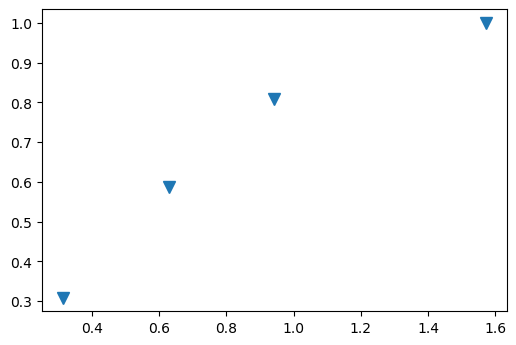

In [13]:
x_a = np.array([0.1, 0.2, 0.3, 0.5]) * np.pi
y_a = np.sin(x_a)
plt.plot(x_a, y_a, 'v', markersize=8)

x_b = np.array([0.1, 1 / 6, 0.3, 0.4]) * np.pi
y_b = np.cos(x_b)

m = 5
a = 0.
b = 1.0
d =(b-a)/m

x = np.arange(a, b+d, d) * np.pi
y = np.sin(x)

#plt.plot(x, y)
#plt.plot(x_a, y_a, 'v', markersize=10)    
#plt.plot(x_b, y_b, '*', markersize=8)
#plt.plot(x_f, y_f, 'v', markersize=8)

        3          2
-0.106 x - 0.0917 x + 1.047 x - 0.00757


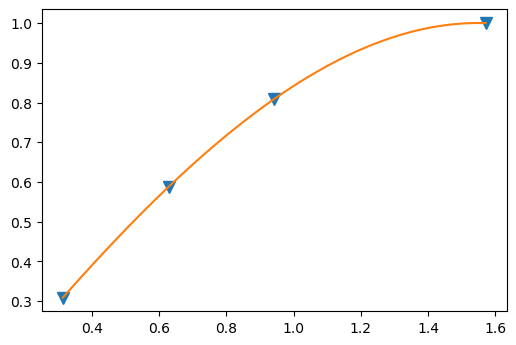

In [14]:
poly_a = interp.lagrange(x_a, y_a)
x_d = np.arange (0.1, 0.51, 0.01)* np.pi
print (poly_a)
plt.plot(x_a, y_a, 'v', markersize=8)
plt.plot(x_d, poly_a(x_d))

### Пример 2

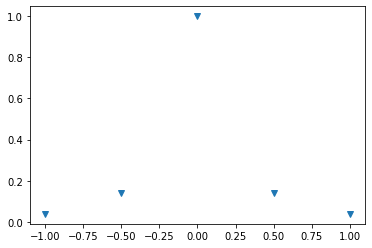

In [3]:
x_c = np.array([-1.0, -0.5, 0.0, 0.5, 1.0]) #*2
y_c = 1/(1+25*x_c*x_c)
plt.plot(x_c, y_c, 'v')

In [25]:
poly_c = interp.PchipInterpolator(x_c, y_c)

print (poly_c)

x_d = np.arange (-1, 1.01, 0.01)

plt.plot(x_c, y_c, 'v')
plt.plot(x_d, poly_c(x_d));

TypeError: __init__() missing 1 required positional argument: 'dydx'

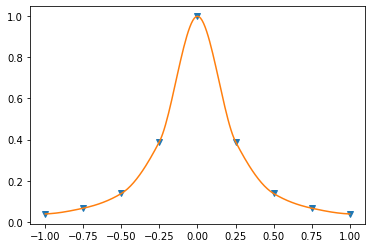

In [26]:
x_f = np.arange(-1.0, 1.25, 0.25)
y_f = 1/(1+25*x_f*x_f)
poly_f = interp.PchipInterpolator(x_f, y_f)
print (poly_f)
x_plot = x_d
plt.plot(x_f, y_f, 'v')
plt.plot(x_plot, poly_f(x_plot))

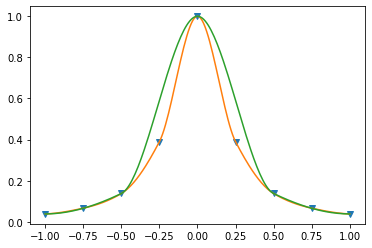

In [27]:
plt.plot(x_f, y_f, 'v')
plt.plot(x_d, poly_f(x_d))
plt.plot(x_d, poly_c(x_d))

## Часть 2. Сплайн - интерполяция

### Пример 3

[-1.  -0.5  0.   0.5  1. ]
[0.  0.5 0.8 1.  0.8]


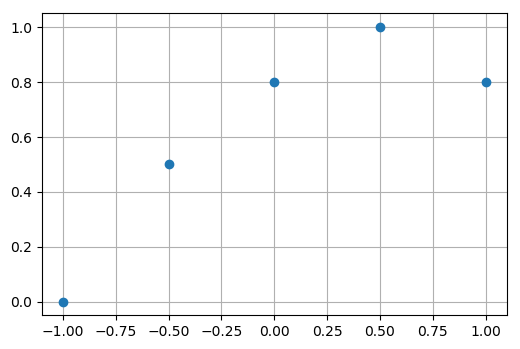

In [60]:
x = np.array([-1, -0.5, 0, 0.5, 1])
y = np.array([0, 0.5, 0.8, 1, 0.8])
print (x)
print (y)

plt.grid()
plt.plot(x, y, 'o')

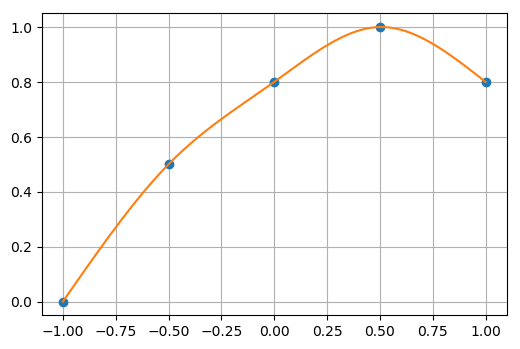

In [61]:
cubic = interp.CubicSpline(x, y, bc_type='natural')

x_d = np.arange (-1, 1.01, 0.01)
plt.grid()
plt.plot(x, y, 'o')
plt.plot(x_d, cubic(x_d))

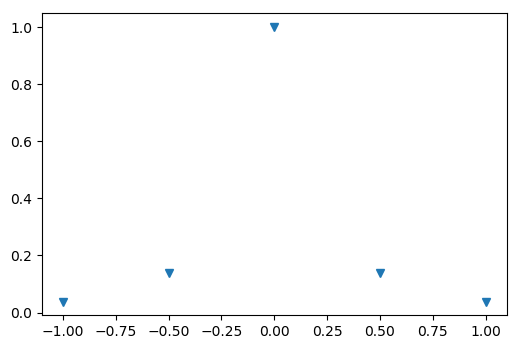

In [68]:
plt.plot(x_c, y_c, 'v')

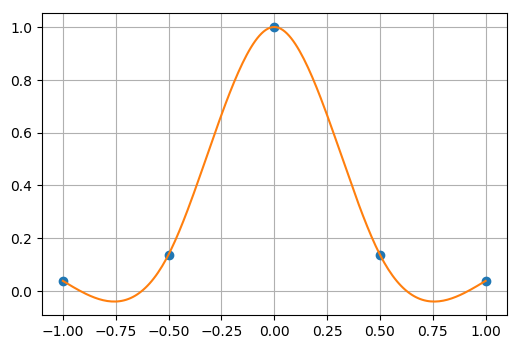

In [62]:
cubic = interp.CubicSpline(x_c, y_c, bc_type='natural')
x_plot = x_d
plt.grid()
plt.plot(x_c, y_c, 'o')

plt.plot(x_plot, cubic(x_plot))

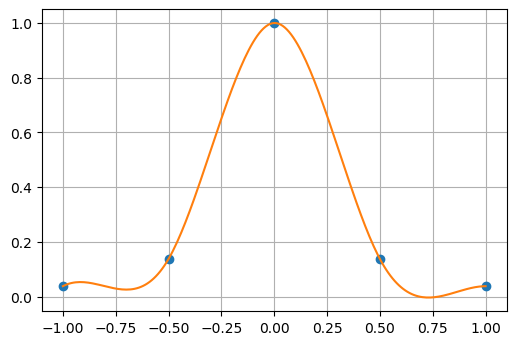

In [51]:
cubic = interp.CubicSpline(x_c, y_c, bc_type=((1, 0.4), (1, 0)))
plt.grid()
x_plot = x_d
plt.plot(x_c, y_c, 'o')
plt.plot(x_plot, cubic(x_plot))